In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.api as sm 
import patsy

# Homework Assignment \#1

*due Thursday, February 15, 2018 at 12.45pm*

### n.b.
All deliverables are required to be typed and all graphs and statistical output generated in Jupyter Notebook using Python and associated packages. Deliverables with *any* handwritten elements will not be accepted and will receive a grade of zero. 

You are required to upload a ```ipynb``` file to **Canvas** as the deliverable. Use the ```homeowrk_01.ipynb``` file as a template and write the answers in text and include relevant code below each question. 

### Question 1

In the SLR model, the probability distribution of $Y$ (i.e., $Y_i$) has the same mean and variance for all levels of $X$ (i.e., $X_i$). True or False? Explain.

The probability distribution of Y has different mean values for different levels of X.

The probability distributions of Y have the same variance, regardless of the level of the predictor variable X.

Explaination:

SLR model relationship equation is $Y_i = \beta_0 + \beta_1X_i + \epsilon_i$
Taking the expectation of the above equation, we have $E[Y_i] = \beta_0 + \beta_1X_i$, from the expectation result, we can see that the mean of Y is a straight line function of X, plus an error term or residual.

Taking the variance of the above equation, we have $V[Y_i] = V[\beta_0] + V[\beta_1X_i] + V[\epsilon_1] = V[\epsilon_1] = \sigma^2$, so the variance of Y tend to be a constant.

### Question 2

The number of points above the fitted regression line is always equal to the number of points below it. True or False? Explain.

False. If we are to plot a regression line by our own visual judgement of the points, we can end up with a line with equal number of points scattered above and below it. 

However, in SLR, we use ordinary least squares to fit the regression line, which means we are plotting a straight line so that the sum of the squares of the vertical distances of the data points from the line is minimum. 
In this way, there is no guarantee that the number of points above the fitted regression line is always equal to the number of points below it.

### Question 3

In a SLR model, what does $\beta_1$ measure?  

$\beta_1$ is the slope of the regression line, indicating the amount that the Y variable (dependent) will change for each 1 unit change in the X variable. 

### Question 4

In the context of an SLR model, prove the following:

- $E[Y_i] = \beta_0 + \beta_1 X_i$ 
- $V(Y_i) = \sigma^2 \hspace{5pt} \forall \hspace{5pt} i$ 

SLR model relationship equation: $Y_i = \beta_0 + \beta_1X_i + \epsilon_i$

Taking expectation on both sides of the above equation:

$E[Y_i] = E[\beta_0 + \beta_1X_i + \epsilon_i]$

$E[Y_i] = E[\beta_0] + E[\beta_1X_i] + E[\epsilon_i]$

$E[Y_i] = \beta_0 + \beta_1E[X_i] + E[\epsilon_i]$, 

since $E[\epsilon_i|X_i] = 0$

$E[Y_i] = \beta_0 + \beta_1X_i$

Taking the variance of SLR model equation:

$V[Y_i] = V[\beta_0 + \beta_1X_i + \epsilon_i]$

$V[Y_i] = V[\beta_0] + V[\beta_1X_i] + V[\epsilon_i]$

$V[Y_i] = V[\epsilon_i] = \sigma^2$

$V[Y_i] = \sigma^2$



### Question 5

For the SLR model, $Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$, how many random variables are there. Explain.

Two. $Y_i$ and $\epsilon_i$ are random variables.

In the SLR model, $\beta_0$ and $\beta_1$ are parameters, $X_i$ is a known constant, $\epsilon_i$ is a random error term. The constant term $\beta_0 + \beta_1x_i$ is the systematic part of $Y_i$, The random term $\epsilon_i$ is the unsystematic part of $Y_i$.

### Question 7

What does a negative value of $\beta_1$ indicate about the relation between $X$ and $Y$?

$$ b_0 = \frac{1}{n} \Big( \sum Y_i - b_1 \sum X_i \Big) $$
$$ b_1 = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sum (X_i - \bar{X})^2}$$

If $\beta_1$ is negative, then each one-unit increase in the explanatory variable X is associated with a fall in outcome of magnitude equal to the absolute value of $\beta_1$.

### Question 8

***DO NOT USE ANY REGRESSION FUNCTIONS OR REGRESSION PACKAGES FOR THIS PROBLEM***

Using the following code

In [3]:
x = np.random.uniform(9, 27, 1000)
y = 0.5*x + np.random.uniform(-2, 2, 1000)
myData = pd.DataFrame(pd.concat([pd.Series(x), pd.Series(y)], axis = 1))
myData.rename(columns={0: "x", 1: "y"}, inplace = True)

manually compute the coefficients $b_0$ and $b_1$ for the SLR model.

In [4]:
#print(myData)
xmean = np.mean(x)
print("xmean",xmean)
ymean = np.mean(y)
print("ymean",ymean)
xsum = np.sum(x)
print("xsum",xsum)
ysum = np.sum(y)
print("ysum",ysum)
b1_denominator = 0.0
for xi in np.nditer(x):
    b1_denominator = b1_denominator + (xi-xmean)*(xi-xmean)
print("b1_denominator",b1_denominator)
b1_numerator = 0.0
for xi, yi in np.nditer([x,y]):
    b1_numerator = b1_numerator + (xi-xmean)*(yi-ymean)
print("b1_numerator",b1_numerator)
b1 = b1_numerator/b1_denominator
b0 = (ysum-b1*xsum)/len(x)
print("b1=",b1)
print("b0=",b0)

xmean 17.918230779979556
ymean 9.011972323816096
xsum 17918.230779979556
ysum 9011.972323816095
b1_denominator 26512.186772883728
b1_numerator 13144.196987192496
b1= 0.49577943531373225
b0= 0.12848198589669482


### Question 10

Are hypotheses tested concerning the actual values of the coefficients, e.g., $\beta_1$, or their estimated values, e.g., $b_1$? Why?

Hypothesis tests concern the actural value of the coefficients, i.e. $\beta_1$, not the estimated values $b_1$. Because the purpose of hyphthesis test is to make inference about values of population parameters. However, for the estimated values, we can calculated them by formula, so there is no need to use hypothesis tests to infer them.

### Question 13

From the discussion of SLR so far, how do you believe outliers will effect the regression line? 

We can compute the regression equation with and without the outlier points, if the SLR line changes dramatically, the outliers affect the regression line, i.e. they are influential points.

There are two ways the outliers will affect the regression line: the slope of the regression line; and the value of coefficient of determination，removing outlier will incress the R value.

### Question 14

Write out the hypothesis test which tests for the statistical significance of $\beta_1$ for an SLR model. Be sure to include the null an alternate hypothesis, the critical value including degrees of freedom (two-tailed test) for $\alpha = 0.05$ and an interpretation of both possible results. 

The hypothesis test take the form

$H_0 : \beta_1 = 0$

$H_a : \beta_1 \neq 0$

If $\beta_1$ is not statistically signigicantly different from zero, the implication is
$E\{Y\} = \beta_0 + (0)X = \beta_0$

For SLR, the sampling distribution of $b_1$ is normal, with mean and variance 
$E\{b_1\} = \beta_1$, $\sigma^2\{b_1\} = \dfrac{\sigma^2}{\displaystyle\sum_{i=1}^{n}{{X_i - \overline{X}}}}$

by replacing the parameter $\sigma^2$ with MSE, the unbiased estimator of $\sigma^2$ is $s^2\{b_1\} = \dfrac{MSE}{\displaystyle\sum_{i=1}^{n}{{X_i - \overline{X}}}}$

Given $b_1$ is normally distributed, we know that the standardized statiscit $(b_1-\beta_1)/\sigma\{b_1\}$ is a standard normal variable, we need to estimate $\sigma\{b_1\}$ by $s\{b_1\}$, and the studentized statistic $(b_1 - \beta_1)/s\{b_1\} \sim t_{(n-2)}$,

We lose 2 degrees of freedom because we estimate $\beta_0$ and $\beta_1$ with $b_0$ and $b_1$.

As the t distribution is symmetric around its mean of 0, it follows that $t_{(\alpha/2;n-2)} = -t_{(1-\alpha/2;n-2)}$,

Since $(b_1 - \beta_1)/s\{b_1\}$ follows a t distribution, we can make the following statement

$P\{b_1-t_{(1-\alpha/2;n-2)}s\{b_1\} \leq \beta_1 \leq \{b_1 + t_{(1-\alpha/2;n-2)}s\{b_1\}\}
 = 1 - \alpha$
 
which holds for all possible values of $\beta_1$, the $1-\alpha$ confidence limits for $\beta_1$ are $b_1 \pm t_{(1-\alpha/2;n-2)}s\{b_1\}$

So the Two-Sided Test Concerning $\beta_1$:

$H_0 : \beta_1 = 0$

$H_a : \beta_1 \neq 0$

$t^* = \dfrac{b_1}{s\{b_1\}}$


$|t^*| \leq t_{(1-\alpha/2,n-2)}$, do not reject $H_0$

$|t^*| > t_{(1-\alpha/2,n-2)}$, reject $H_0$

given $\alpha = 0.05$, we have 

$|t^*| \leq t_{(0.975,n-2)}$, do not reject $H_0$

$|t^*| > t_{(0.975,n-2)}$, reject $H_0$


### Question 15

Using ```modified_SENIC_data_01.csv```
1. Regress Infection Risk ($Y$) on Length of Stay ($X$). Report the $R^2$, $b_0$ and $b_1$  values.
2. Multiply the observations, both $X$ and $Y$, by 192; we will refer to these as $X_{(2)}$ and $Y_{(2)}$. Regress $Y_{(2)}$ on $X_{(2)}$. Report the $R^2$, $b_0$ and $b_1$  values.
3. Multiply only $Y$ by 47; we will refer to this as $Y_{(3)}$. Regress $Y_{(3)}$ on $X$. Report the $R^2$, $b_0$ and $b_1$  values.
4. Multiply only $X$ by 12; we will refer to this as $X_{(3)}$. Regress $Y$ on $X_{(3)}$. Report the $R^2$, $b_0$ and $b_1$  values.


**Succinctly** explain what you have gleaned from this exercise. Include a summarized tabular representation of the regression output and the associated $R^2$, $b_0$ and $b_1$ values.

In [5]:
senicData = pd.read_csv('modified_SENIC_data_01.csv')
senicOLSmodel = sm.OLS.from_formula('infectionRisk ~ lengthOfStay', senicData).fit()
print("==== Regress Y ~ X ====")
print("b0={}".format(senicOLSmodel.params[0]))
print("b1={}".format(senicOLSmodel.params[1]))
print("R-squared={}".format(senicOLSmodel.rsquared))
#print(senicOLSmodel.summary())
senicData2 = senicData.copy()
senicData2.lengthOfStay = senicData2.lengthOfStay.apply(lambda x:x*192)
senicData2.infectionRisk = senicData2.infectionRisk.apply(lambda y:y*192)
senicOLSmodel = sm.OLS.from_formula('infectionRisk ~ lengthOfStay', senicData2).fit()
print("")
print("==== Regress Y(2) ~ X(2) ====")
print("b0={}".format(senicOLSmodel.params[0]))
print("b1={}".format(senicOLSmodel.params[1]))
print("R-squared={}".format(senicOLSmodel.rsquared))
#print(senicOLSmodel.summary())
senicData3 = senicData.copy()
senicData3.infectionRisk = senicData3.infectionRisk.apply(lambda y:y*47)
senicOLSmodel = sm.OLS.from_formula('infectionRisk ~ lengthOfStay', senicData3).fit()
print("")
print("==== Regress Y(3) ~ X ====")
print("b0={}".format(senicOLSmodel.params[0]))
print("b1={}".format(senicOLSmodel.params[1]))
print("R-squared={}".format(senicOLSmodel.rsquared))
#print(senicOLSmodel.summary())
senicData4 = senicData.copy()
senicData4.lengthOfStay = senicData4.lengthOfStay.apply(lambda x:x*12)
senicOLSmodel = sm.OLS.from_formula('infectionRisk ~ lengthOfStay', senicData4).fit()
print("")
print("==== Regress Y ~ X(3) ====")
print("b0={}".format(senicOLSmodel.params[0]))
print("b1={}".format(senicOLSmodel.params[1]))
print("R-squared={}".format(senicOLSmodel.rsquared))
#print(senicOLSmodel.summary())

==== Regress Y ~ X ====
b0=0.7443037459602998
b1=0.3742168626809075
R-squared=0.284562320773181

==== Regress Y(2) ~ X(2) ====
b0=142.90631922437797
b1=0.37421686268090726
R-squared=0.2845623207731809

==== Regress Y(3) ~ X ====
b0=34.98227606013408
b1=17.58819254600264
R-squared=0.2845623207731811

==== Regress Y ~ X(3) ====
b0=0.7443037459603022
b1=0.03118473855674227
R-squared=0.284562320773181


##### Obeservation from the results of Question 15:

| dataset | b0                 | b1                  | R-squared          |
|---------|--------------------|---------------------|--------------------|
| 1       | 0.7443037459602998 | 0.3742168626809075  | 0.284562320773181  |
| 2       | 142.90631922437797 | 0.37421686268090726 | 0.2845623207731809 |
| 3       | 34.98227606013408  | 17.58819254600264   | 0.2845623207731811 |
| 4       | 0.7443037459603022 | 0.03118473855674227 | 0.284562320773181  |



1. Multipling X and Y with same coefficient does not change the slope $b_1$ of regression line, but will affect the intercept $b_0$ value. Notice that 142.9 / 0.7443 = 192

2. Only multipling Y with a positive value while keeping X unchanged increases the intercept $b_0$ and slope $b_1$ value at the same rate. Notice that 34.98/0.7443 = 17.59/0.3742 = 46.99

3. Only multipling X with a positive value while keeping Y unchanged decreases the slope $b_1$ , but has no effect on intercept $b_0$. Notice that 0.3742/0.0331 = 12


### Question 16

Using the ```fourDataSets.csv```, regress $Y$ on $X$ for $i=1,2,3,4$, i.e., generate four separate SLR models. **For each** of the four data sets, run and report summary statistics, generate a scatter plot and run a SLR model, reporting the regression function $R^2$, $R_a^2$, and the significance of $b_1$ ($p$-value). Intelligently discuss what you observe about each data set and the data sets as a whole.

==== Regression for i = 1 ====
R^2=0.666542459508775
Ra^2=0.6294916216764166
b0=3.000090909090909
b1=0.5000909090909091
p=0.002169628873078794
==== Regression for i = 2 ====
R^2=0.6662420337274844
Ra^2=0.6291578152527604
b0=3.0009090909090905
b1=0.5
p=0.0021788162369108005
==== Regression for i = 3 ====
R^2=0.6663240410665592
Ra^2=0.6292489345183991
b0=3.002454545454545
b1=0.4997272727272729
p=0.002176305279228019
==== Regression for i = 4 ====
R^2=0.6667072568984653
Ra^2=0.6296747298871836
b0=3.0017272727272712
b1=0.4999090909090911
p=0.0021646023471972183


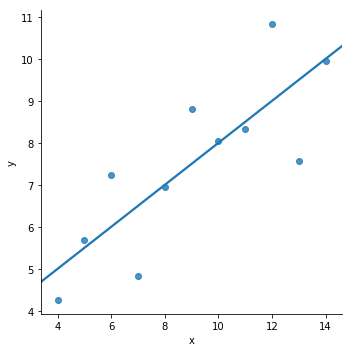

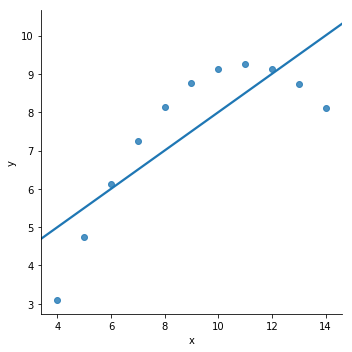

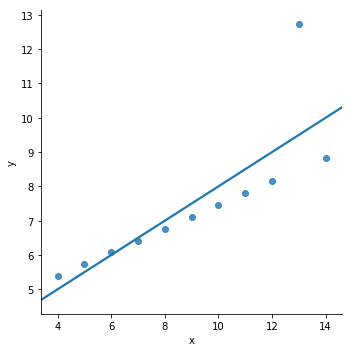

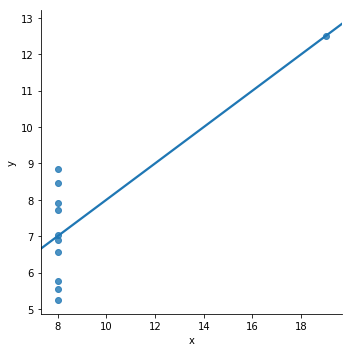

In [6]:
data = pd.read_csv('fourDataSets.csv')
data_idx = [1,2,3,4]
for i in data_idx:
    data_i = data[(data.dataSet==i)]
    olsmodel = sm.OLS.from_formula('y ~ x', data_i)
    resid = olsmodel.fit()
    b0 = resid.params[0]
    b1 = resid.params[1]
    print("==== Regression for i = {} ====".format(i))
    xyplot = sns.lmplot("x", "y", data=data_i, ci = None)
    print("R^2={}".format(resid.rsquared))
    print("Ra^2={}".format(resid.rsquared_adj))
    print("b0={}".format(resid.params[0]))
    print("b1={}".format(resid.params[1]))
    print("p={}".format(resid.pvalues[1]))
    #print(resid.summary())  

##### Observation on results of four data sets

| dataset | b0      | b1     | R-squared | Adj-R-squared | p-value  |
|---------|---------|--------|-----------|---------------|----------|
| 1       | 3.00009 | 0.5000 | 0.6665    | 0.62949       | 0.002169 |
| 2       | 3.00090 | 0.5    | 0.6662    | 0.62915       | 0.002178 |
| 3       | 3.00245 | 0.4997 | 0.6663    | 0.62924       | 0.002176 |
| 4       | 3.00172 | 0.4999 | 0.6667    | 0.62967       | 0.002164 |


1. These four datasets have approximately same $R^2,R^2_a,\beta_0,\beta_1,p-value$, however, they have different types of data distribution patterns. The dataset_1 has a loosely scattered data points around the fitted regression line. The dataset_2 obviously better fits a non-linear regression model. The dataset_3 is best fitted by the regression line, with an outlier contributing to it. The dataset_4 does not comply with the regression model, regardless of the $R^2$ value being 0.667, which is considered not low. 

2. It is helpful to devide the entire dataset into sub datasets and analyze them separately. Different subsets of data can have different patterns of distributtion and behavior. Which enables us to get a comprehensive understanding of the whole dataset.
